In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("val_stats.csv")

C:\Users\Swift\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Data Cleaning

In [2]:
df.drop(df.columns[[0, 1, 2, 3, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 21, 22, 24, 25, 26, 29, 30, 31, 34, 35, 36]], axis=1, inplace=True)
df.drop(df.index[5000:], axis = 0, inplace=True)
df.head()

,damage_round,headshots,headshot_percent,kills,wins,win_percent,agent_1,gun1_name,gun1_kills,gun2_name,gun2_kills,gun3_name,gun3_kills
0,135.8,992,24.9,"1,506",59,59.6,Fade,Vandal,802,Phantom,220,Classic,147
1,170.3,879,28.3,"1,608",52,65.8,Chamber,Vandal,689,Operator,226,Phantom,137
2,147.5,720,24.0,"1,115",42,65.6,Yoru,Vandal,444,Phantom,231,Operator,102
3,178.2,856,37.3,"1,134",32,62.8,Jett,Vandal,754,Sheriff,48,Phantom,36
4,149.8,534,24.4,869,32,62.8,Jett,Vandal,419,Spectre,65,Operator,64


In [3]:
df['agent_1'].replace(['Fade', 'Chamber', 'Yoru', 'Jett', 'Sage', 'KAY/O', 'Sova', 'Raze', 'Omen', 'Breach', 'Reyna', 'Neon', 'Skye', 'Viper', 'Brimstone', 'Phoenix', 'Astra', 'Killjoy', 'Cypher'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], inplace=True)
df['gun1_name'].replace(['Vandal', 'Operator', 'Phantom', 'Judge', 'Odin', 'Guardian', 'Spectre', 'Classic', 'Ghost', 'Sheriff', 'Marshal', 'Shorty', 'Bulldog', 'Frenzy', 'Bucky', 'Ares', 'Stinger'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], inplace=True)
df['gun2_name'].replace(['Vandal', 'Operator', 'Phantom', 'Judge', 'Odin', 'Guardian', 'Spectre', 'Classic', 'Ghost', 'Sheriff', 'Marshal', 'Shorty', 'Bulldog', 'Frenzy', 'Bucky', 'Ares', 'Stinger'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], inplace=True)
df['gun3_name'].replace(['Vandal', 'Operator', 'Phantom', 'Judge', 'Odin', 'Guardian', 'Spectre', 'Classic', 'Ghost', 'Sheriff', 'Marshal', 'Shorty', 'Bulldog', 'Frenzy', 'Bucky', 'Ares', 'Stinger'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], inplace=True)

df['headshots'] = df['headshots'].str.replace(",","",regex = False)
df['headshots'] = df['headshots'].astype(int)
df['kills'] = df['kills'].str.replace(",","",regex = False)
df['kills'] = df['kills'].astype(int)
df['gun1_kills'] = df['gun1_kills'].str.replace(",","",regex = False)
df['gun1_kills'] = df['gun1_kills'].astype(int)
df['gun2_kills'] = df['gun2_kills'].str.replace(",","",regex = False)
df['gun2_kills'] = df['gun2_kills'].astype(int)
df.dtypes

damage_round        float64
headshots             int32
headshot_percent    float64
kills                 int32
wins                  int64
win_percent         float64
agent_1               int64
gun1_name             int64
gun1_kills            int32
gun2_name             int64
gun2_kills            int32
gun3_name             int64
gun3_kills            int64
dtype: object

In [4]:
df.head()

,damage_round,headshots,headshot_percent,kills,wins,win_percent,agent_1,gun1_name,gun1_kills,gun2_name,gun2_kills,gun3_name,gun3_kills
0,135.8,992,24.9,1506,59,59.6,0,0,802,2,220,7,147
1,170.3,879,28.3,1608,52,65.8,1,0,689,1,226,2,137
2,147.5,720,24.0,1115,42,65.6,2,0,444,2,231,1,102
3,178.2,856,37.3,1134,32,62.8,3,0,754,9,48,2,36
4,149.8,534,24.4,869,32,62.8,3,0,419,6,65,1,64


Exploratory Data Analysis

To begin, we cleaned up the data in a variety of ways. The first step was ensuring that we scaled the dataset down a bit as the original set contained over 80,000+ rows. We scaled this down to a sample of 5000. This dataset also contained a lot of features that weren't relevent to the point of this project and we dropped those columns from the dataset as well such as player name, region, and round scores. We then cleaned up the data as a lot of columns were objects instead of ints as a way to use commas to signify 1000s. From there we assigned the categorical values of agent names and gun names to more easily perform statistical analysis on. Throughout this report, while the visualizations will refer to the encoded numeric value of the variable, during the analysis we will refer to them by their categorical name.

<AxesSubplot:xlabel='kills', ylabel='wins'>

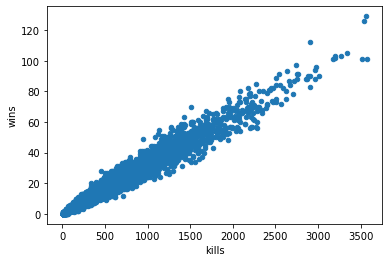

In [5]:
df.plot.scatter(x = 'kills', y = 'wins')

Here we have a scatterplot analyzing the amount of kills each player has gotten throughout the season compared to how many wins they have achieved throughout the season. We can see that there is a strong positive relationship between the amount of kills a player has and their win rate. From the graph we can conclude that the amount of games a player wins is heavily dictated by the amount of kills they are able to obtain during the game. 

<AxesSubplot:xlabel='Players', ylabel='Kills by Weapon'>

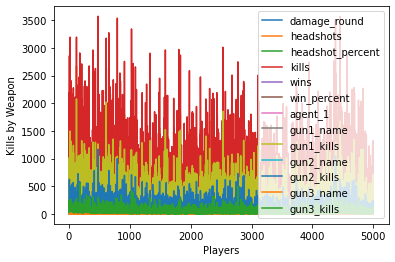

In [6]:
df.plot(xlabel="Players", ylabel="Kills by Weapon")

Here we have a plot that shows the difference in the amount of kills a player gets as well as the subtype of weapons that tend to contribute the most to the their kill count. A players main gun (gun1) tends to contribute the most to their kill score while the players secondary weapons (gun2) come in second and their tertiary weapons (gun3) come in last. 

<AxesSubplot:xlabel='gun1_name'>

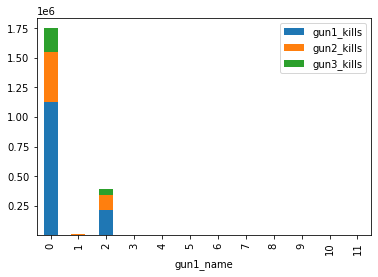

In [7]:
df.groupby(["gun1_name"]).sum().plot(kind='bar',stacked=True,y=["gun1_kills","gun2_kills","gun3_kills"])

Here we have another visualization to show how gun1 gets a majority of the kills, with gun2 second, and gun3 getting the least amount of kills.

<AxesSubplot:ylabel='wins'>

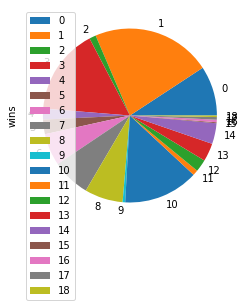

In [8]:
df.groupby(['agent_1']).sum().plot(kind='pie',y='wins')

Here we analyze the amount of wins a player has alongside the agent they play that gets the most wins. Here it's easy to see that Chamber and Jett are easily the best availible agents to pick at the moment as the amount of wins they contribute to a players win rate dwarfs the other agents in the game with Reyna being the 3rd most winning agent pick.

Text(0, 0.5, 'Gun kills')

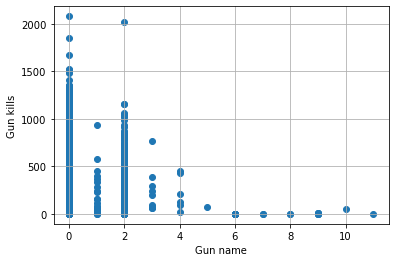

In [9]:
import matplotlib.pyplot as plt

plt.scatter(df['gun1_name'], df['gun1_kills'])
plt.grid(True)
plt.xlabel("Gun name")
plt.ylabel("Gun kills")

Here we have a scatterplot comparing each individual weapon and the kills they get within the players main gun loadout. We can see from the data that the Vandal and the Phantom are by far the most popular weapons to use as well as the weapons that put up the most kills for most players. The Operator, the games primary sniper isn't far behind putting up the 3rd most amount of kills for players. This makes sense as they are the three most expensive weapons as well as the main weapons that the game intends players to use during most rounds. It also explains why the cheaper and weaker weapons tend to get less kills as they are only used on rounds where the team is trying to save money which is only during certain conditions of the game.

Text(0.5, 1.0, 'Win Percentage of Players per Agent')

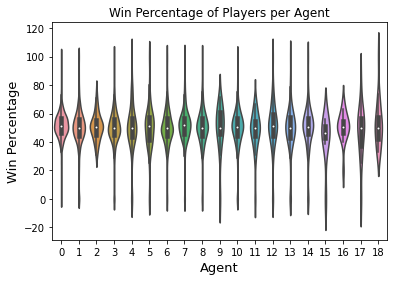

In [10]:
import seaborn as sns

violinPlot1 = sns.violinplot(x = df["agent_1"], y = df["win_percent"])
violinPlot1.set_xlabel("Agent", fontsize = 13)
violinPlot1.set_ylabel("Win Percentage", fontsize = 13)
plt.title("Win Percentage of Players per Agent")

Here we compare the win rate of players and the main agent they like to use. We can see that for the most part, agent win rates all fall within a similar range of each other with a few exceptions. The agents Killjoy and Phoenix have lower win rates that characters such as Cypher who has the highest win rate according to the graph. While its mostly similar enough to conclude that agent picks aren't as important when you get to a higher level of play, there are still agents that seem to perform better even in the toughest of competitions. 

K-Means Clustering

Here our goal is to use the headshot statistics to create 4 main clusters to identify the best players in their rank. The intuition here is that as headshot ratings increase, the cluster will get tighter towards the top insintuating that less people are able to achieve such a high standard of play.

In [11]:
kmean_df=df
kmean_df.head()

,damage_round,headshots,headshot_percent,kills,wins,win_percent,agent_1,gun1_name,gun1_kills,gun2_name,gun2_kills,gun3_name,gun3_kills
0,135.8,992,24.9,1506,59,59.6,0,0,802,2,220,7,147
1,170.3,879,28.3,1608,52,65.8,1,0,689,1,226,2,137
2,147.5,720,24.0,1115,42,65.6,2,0,444,2,231,1,102
3,178.2,856,37.3,1134,32,62.8,3,0,754,9,48,2,36
4,149.8,534,24.4,869,32,62.8,3,0,419,6,65,1,64


In [12]:
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmean_df=kmean_df.to_numpy()
y_km = km.fit_predict(kmean_df)
y=y_km
print(y)
print(km.labels_)

[1 1 1 ... 1 1 3]
[1 1 1 ... 1 1 3]


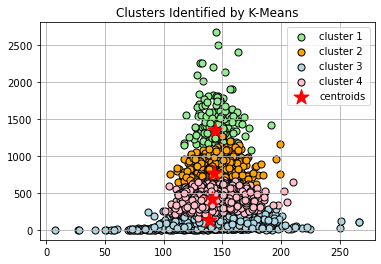

In [13]:
#plot of clusters & centroids
plt.title("Clusters Identified by K-Means")
plt.scatter(kmean_df[y == 0, 0], kmean_df[y == 0, 1],s=50, c='lightgreen',marker='o', edgecolor='black',label='cluster 1')
plt.scatter(kmean_df[y == 1, 0], kmean_df[y == 1, 1],s=50, c='orange',marker='o', edgecolor='black',label='cluster 2')
plt.scatter(kmean_df[y == 2, 0], kmean_df[y == 2, 1],s=50, c='lightblue',marker='o', edgecolor='black',label='cluster 3')
plt.scatter(kmean_df[y == 3, 0], kmean_df[y == 3, 1],s=50, c='pink',marker='o', edgecolor='black',label='cluster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],s=250, marker='*',c='red', edgecolor='red',label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

We can see that through the use of k-means clustering, we were able to successfully cluster the headshot data into 4 distinct player rankings that confirm our intuition. With cluster 1 being the best players with the highest headshot ratings and cluster 4 being the lower ranked players with lower headshot ratings. We can see that the graph and clusters tighten up as headshot rating increases implying that there are a lower amount of players able to achieve that level of play. We see that cluster 1 has a few standout outliers that go far beyond their predecessors, clusters 2 and 3 are fairly tight knit with most players being very similar in skill and cluster 4 has the most variance with both low and high outliers at the lower ranks. 

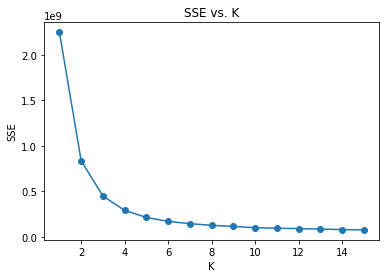

In [14]:
##elbow method
sse = []
##runnning for K 1:15
for i in range(1, 16):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0)
    km.fit(kmean_df)
    sse.append(km.inertia_)

#plot of SSE vs. K
plt.plot(range(1, 16), sse, marker='o')
plt.title("SSE vs. K")
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

Here we confirm our choice of K using the elbow method. We can see that 4 was a solid choice for K compared to most of the other available choices.

To conclude, we were able to successfully run EDA on multiple aspects of the data as well as implement k-means clustering to group up players within their skill level based on their headshot rating. This shows that it is possible to further improve skill-based matchmaking to ensure that players are matched up with other players around their skill level to avoid the problems plaguing current competitive gaming such as smurfs and matchmaking on insufficient conditions. We can conclude that based on the clusters, as a player improves their headshot rating, in other words, their skill, they can be successfully grouped among other individuals who are around their skill level to ensure the playing field is even and tough!